# Penguin Classification EDA and ML Project

### This project intents to train a model to properly classify the peguins from the database available on kaggle. (https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data)

### The project will check for NA values and for possible values outside spec, treating them properly. Followed by some EDA and then training a model comparing decision tree and random forest methods.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('../input/palmer-archipelago-antarctica-penguin-data/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


<AxesSubplot:>

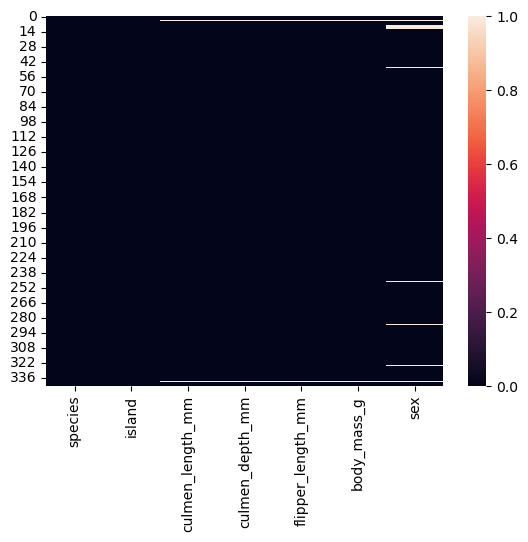

In [3]:
#Visually check for NA values
sns.heatmap(df.isna())

In [4]:
df.isna().sum()
#There are only a few rows with na values, possible 12. To make this part of the project simple I'll drop these rows.

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Remove NA
Since there are little entries that are empty the rows will be simply removed

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [8]:
#Apparently there is a row in 'sex' column with '.'. I'll drop that row as well.

df.drop(df.index[df['sex'] == '.'].tolist(),inplace=True)

In [9]:
df.reset_index(inplace=True)

In [10]:
df.drop('index', axis=1, inplace=True)
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


## EDA

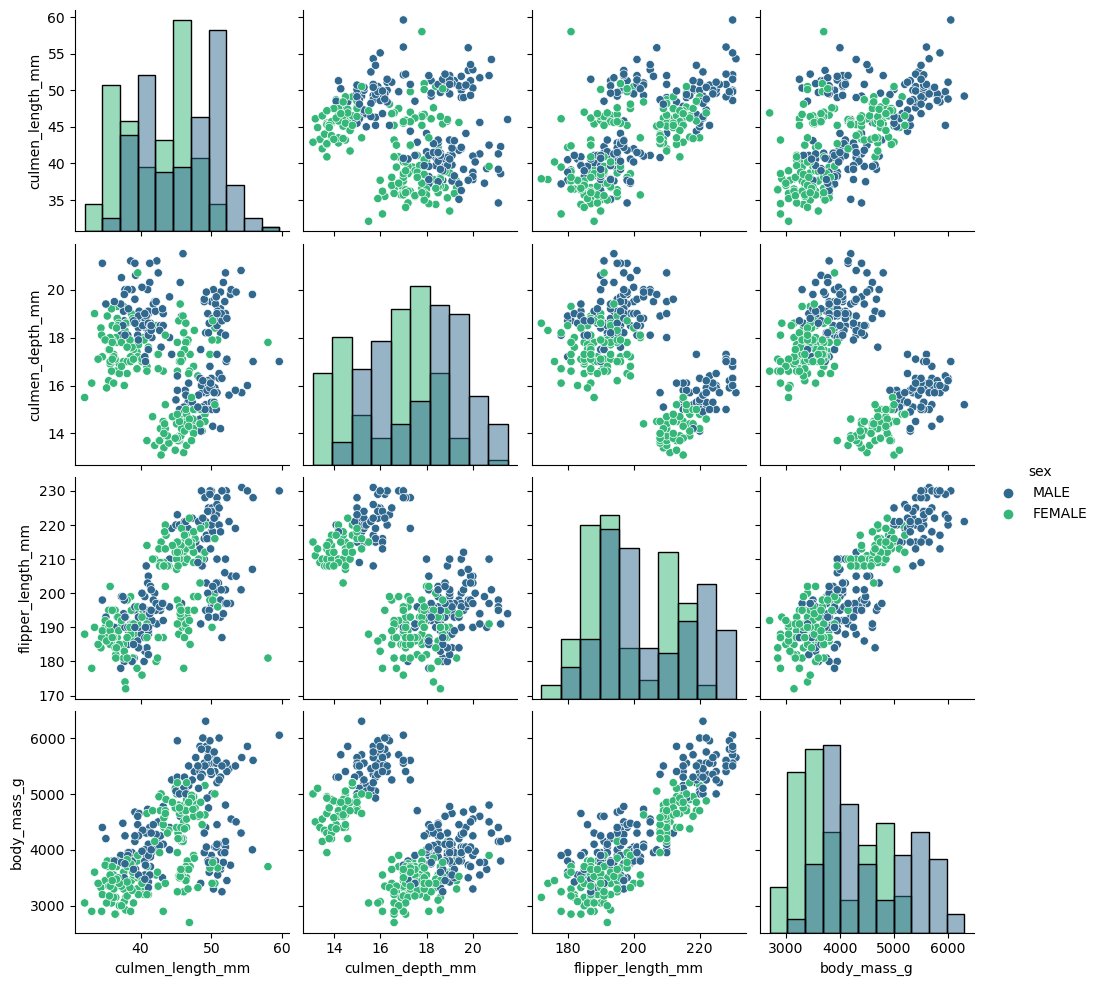

In [11]:
sns.pairplot(data=df, hue='sex', diag_kind='hist', palette='viridis')

#Some features are clear to have a direct relationship with 'sex'.

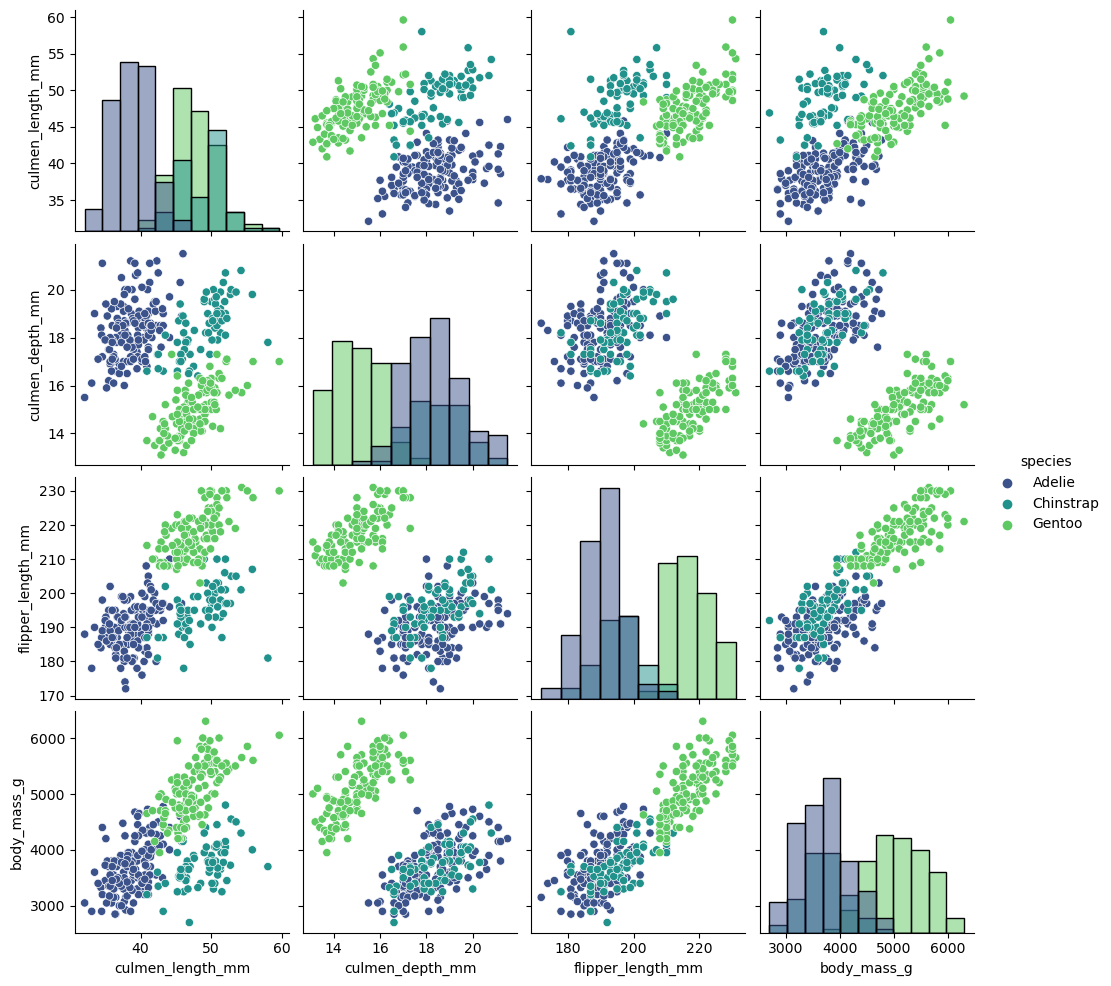

In [12]:
sns.pairplot(data=df, hue='species', diag_kind='hist', palette='viridis')

#Very clear differences between species and some features, like body mass against culmen depth

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

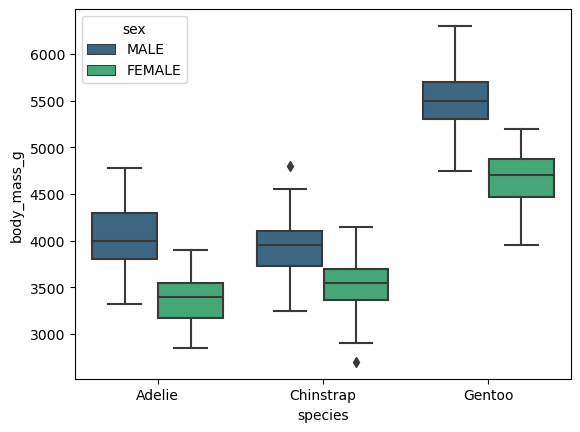

In [13]:
sns.boxplot(data=df, x='species', y='body_mass_g', hue='sex', palette='viridis')

#There are some differences of weight depending of sex. 
#Sex will be converted from categorical to dummies using pandas

<AxesSubplot:xlabel='species', ylabel='count'>

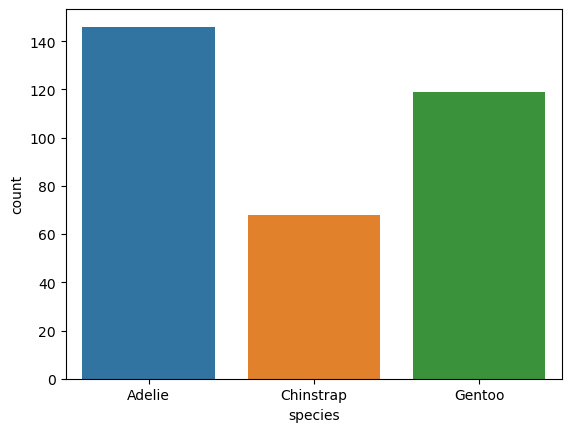

In [14]:
sns.countplot(data=df, x='species')


#Data does not seem super balanced, there are less Chinstrap then the other two species.
#The model can have a hard time with that species


#Similarly to sex, island will be converted from categorical to dummy

<AxesSubplot:>

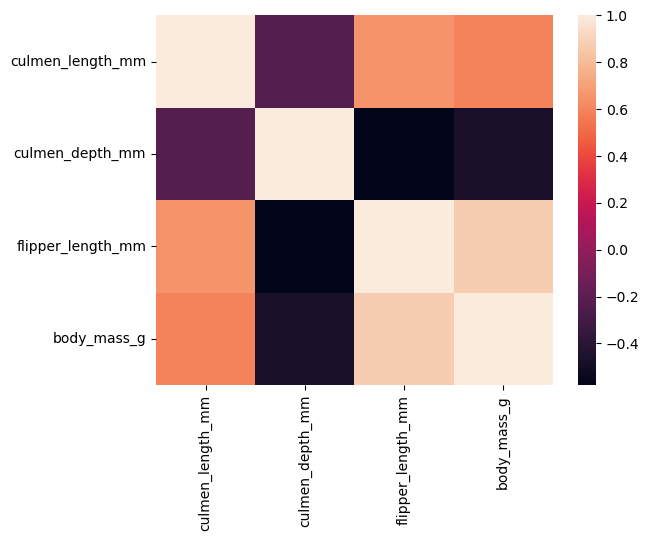

In [15]:
sns.heatmap(df.corr())

## Converting 'sex' column to dummy variables

In [16]:
df_male = pd.get_dummies(data=df['sex'], drop_first=True)
df_male

,MALE
0,1
1,0
2,0
3,0
4,1
...,...
328,0
329,0
330,1
331,0


In [17]:
df = pd.concat([df,df_male], axis=1)
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,MALE
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,1


In [18]:
df_island = pd.get_dummies(data=df['island'])

df = pd.concat([df,df_island], axis=1)
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,MALE,Biscoe,Dream,Torgersen
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,1,0,0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0,0,0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0,0,0,1
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0,0,0,1
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,1,0,0,1


In [19]:
pgn = df.drop(['island','sex'], axis=1)
pgn.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,MALE,Biscoe,Dream,Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,1,0,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,0,0,0,1
3,Adelie,36.7,19.3,193.0,3450.0,0,0,0,1
4,Adelie,39.3,20.6,190.0,3650.0,1,0,0,1


## Machine Learning

Study will procede with random forest and compare to decision tree outome for study purposes

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
#Defining what is the answer (y) and the variables (Xs)
X = pgn.drop('species', axis=1)
y = pgn['species']

#Splitting the data between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Decision Forest

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
#Creating an instance to make life easier
tree = DecisionTreeClassifier()

In [24]:
#Training Model
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
#Predictions
pred_dt = tree.predict(X_test)

In [26]:
#import classification and confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

In [27]:
print(confusion_matrix(y_test, pred_dt))
print('\n')
print(classification_report(y_test, pred_dt))

[[39  1  0]
 [ 1 26  0]
 [ 1  0 32]]


              precision    recall  f1-score   support

      Adelie       0.95      0.97      0.96        40
   Chinstrap       0.96      0.96      0.96        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



### Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rfc = RandomForestClassifier(n_estimators=400)

In [30]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=400)

In [31]:
#Predictions
pred_rfc = rfc.predict(X_test)

In [32]:
print(confusion_matrix(y_test, pred_rfc))
print('\n')
print(classification_report(y_test, pred_rfc))

[[40  0  0]
 [ 1 26  0]
 [ 0  0 33]]


              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        40
   Chinstrap       1.00      0.96      0.98        27
      Gentoo       1.00      1.00      1.00        33

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



### Comparing Methods

In [33]:
print(confusion_matrix(y_test, pred_dt))
print('\n')
print(confusion_matrix(y_test, pred_rfc))

[[39  1  0]
 [ 1 26  0]
 [ 1  0 32]]


[[40  0  0]
 [ 1 26  0]
 [ 0  0 33]]


In [34]:
print(classification_report(y_test, pred_dt))
print('\n')
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

      Adelie       0.95      0.97      0.96        40
   Chinstrap       0.96      0.96      0.96        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        40
   Chinstrap       1.00      0.96      0.98        27
      Gentoo       1.00      1.00      1.00        33

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



### Model improved a little using random forest, not enough to justify the use of it.
### Difference is more appears in larger datasets

In [35]:
rfc.feature_importances_

array([0.31789268, 0.13996783, 0.24273147, 0.13287831, 0.00708083,
       0.06929875, 0.06971007, 0.02044005])